# Informe caso práctico

In [10]:
getwd()

[1] "C:/Users/Joako/Documents/R_proyectos/Caso_practico/Informe_jupyter"

El siguiente informe muestra el análisis realizado con la base de datos suministrada por la empresa bellabet sobre el registro de uso de dispositivos inteligentes de 33 personas durante el período de un mes. Los datos se expresan en distintas variables tales como: numero de pasos, calorías gastadas, intensidad de la actividad, tiempo de sueño, entre otras.
La idea es poder observar algunos patrones a partir del uso que hacen éstas personas a fin de poder identificar algunas oportunidades de mejora para mi interesada, la empresa Bellabet.

### Preguntas que guían el análisis

1. ¿La actividad física recopilada por los dispositivos inteligentes puede generar oportunidades de negocio?
2. ¿Cómo usan los dispositivos inteligentes los consumidores?
    + ¿Existen usuarios con poco o ningún uso del dispositivo?
    + ¿El uso del dispositivo en que medida está relacionado con la cantidad de actividad física realizada?
    + ¿Existe alguna relación entre el tiempo de sueño y la actividad física?
    + ¿Existe algún patrón en el uso de los dispositivos inteligentes?
        + Relación entre distancia y calorias gastadas
        + Relación entre la intensidad y las calorías gastadas
Luego de revisar cada uno de los data.frame. He decidido seleccionar los siguientes para el análisis ya que son los adecuados para responder a las preguntas que guían ésta investigación.

Tablas Seleccionadas               | Nombre data.frame
-----------------------------------|------------------------
dailyActivity_merged.csv           | daily_activity
sleepDay_merged.csv                | sleep_day_df
minuteCaloriesNarrow_merged.csv    | min_calories_narrow
minuteIntensitiesNarrow_merged.csv | min_intensities_narrow
hourlyIntensities_merged.csv       | hourly_intensities
hourlyCalories_merged.csv          | hourly_calories

Una vez elegidas las tablas pasaré al proceso creación de data.frame de trabajo, limpieza y formateo de los mismos. Para ello instalaré los paquetes necesarios que me permitiran formatear, manipular y transformar los datos:
* tidyverse
* janitor
* skimr

In [2]:
install.packages("tidyverse", dependencies = TRUE)

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'feather', 'mockr'




package 'feather' successfully unpacked and MD5 sums checked
package 'mockr' successfully unpacked and MD5 sums checked
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\Rtmpk1uyIw\downloaded_packages


In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [17]:
install.packages("janitor")

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'janitor' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\RtmpimSnBs\downloaded_packages


In [16]:
install.packages("skimr")

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'skimr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\RtmpimSnBs\downloaded_packages


Este paquete ggrepel me ayuda con los gráficos para evitar que las etiquetas se solapen

In [118]:
install.packages("ggrepel")

Installing package into 'C:/Users/Joako/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Joako\AppData\Local\Temp\RtmpimSnBs\downloaded_packages


In [119]:
library(ggrepel)

In [18]:
library(janitor)


Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




In [19]:
library(skimr)

In [20]:
library(lubridate)

In [90]:
library(IRdisplay)

### Creación de los data frame a partir de las tablas seleccionadas

In [11]:
daily_activity <- 
  read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\dailyActivity_merged.csv")
head(daily_activity)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [12]:
sleep_day_df <- 
  read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\sleepDay_merged.csv")
head(sleep_day_df)

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [13]:
min_calories_narrow <- 
  read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\minuteCaloriesNarrow_merged.csv")
head(min_calories_narrow)

Rows: 1325580 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityMinute
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityMinute,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0.7865
1503960366,4/12/2016 12:01:00 AM,0.7865
1503960366,4/12/2016 12:02:00 AM,0.7865
1503960366,4/12/2016 12:03:00 AM,0.7865
1503960366,4/12/2016 12:04:00 AM,0.7865
1503960366,4/12/2016 12:05:00 AM,0.9438


In [14]:
min_intensities_narrow <- 
  read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\minuteIntensitiesNarrow_merged.csv")
head(min_intensities_narrow)

Rows: 1325580 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityMinute
dbl (2): Id, Intensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityMinute,Intensity
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0
1503960366,4/12/2016 12:01:00 AM,0
1503960366,4/12/2016 12:02:00 AM,0
1503960366,4/12/2016 12:03:00 AM,0
1503960366,4/12/2016 12:04:00 AM,0
1503960366,4/12/2016 12:05:00 AM,0


In [151]:
hourly_intensities <- read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\hourlyIntensities_merged.csv")
head(hourly_intensities)

Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [186]:
hourly_calories <- read_csv("C:\\Users\\Joako\\Documents\\R_proyectos\\Caso_practico\\data_trabajo\\hourlyCalories_merged.csv") 
head(hourly_calories)

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


#### Verificación de registros de usuarios y observaciones
Los datos recopilados son de 33 usuarios durante 30 días, con lo cual compruebo si los data.frame tienen el mismo numero de registro y mismos usarios

In [155]:
n_unique(daily_activity$Id)
n_unique(sleep_day_df$Id)
n_unique(min_calories_narrow$Id)
n_unique(min_intensities_narrow$Id)
n_unique(hourly_intensities$Id)

Warning message:
"Unknown or uninitialised column: `Id`."


[1] 0

Warning message:
"Unknown or uninitialised column: `Id`."


[1] 0

Warning message:
"Unknown or uninitialised column: `Id`."


[1] 0

Warning message:
"Unknown or uninitialised column: `Id`."


[1] 0

[1] 33

In [187]:
n_unique(hourly_calories$Id)

[1] 33

In [22]:
sum(duplicated(daily_activity))
sum(duplicated(sleep_day_df))
sum(duplicated(min_calories_narrow))
sum(duplicated(min_intensities_narrow))

[1] 0

[1] 3

[1] 0

[1] 0

In [156]:
sum(duplicated(hourly_intensities))

[1] 0

In [189]:
sum(duplicated(hourly_calories))

[1] 0

 Nombre data.frame     | Número se sujetos | Registros duplicados
-----------------------|-------------------|----------------------
daily_activity         | 33                | 0
sleep_day_df           | 24                | 3
min_calories_narrow    | 33                | 0
min_intensities_narrow | 33                | 0

En este resumen se puede comprobar que el data.frame sleep_day_df tiene 7 sujetos de los que no se tienen registros de tiempo de sueño y adicionalmente de los 24 sujetos existen 3 con registros duplicados con lo cual eliminaré esos registros duplicados.

In [23]:
sleep_day_df <- sleep_day_df %>%
  distinct() %>%
  drop_na()

Comprobación:

In [24]:
sum(duplicated(sleep_day_df))

[1] 0

#### Limpiando y renombrando columnas
La idea es que todas las columnas estén estandarizadas con respectos a sus *nombres*, *espaciado* y el *formato tolower*. Para todos los data.frame la columna que hace referencia a la fecha llevaran el nombre **date** 

In [25]:
clean_names(daily_activity)
clean_names(sleep_day_df)
clean_names(min_calories_narrow)
clean_names(min_intensities_narrow)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_minute,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0.7865
1503960366,4/12/2016 12:01:00 AM,0.7865
1503960366,4/12/2016 12:02:00 AM,0.7865
1503960366,4/12/2016 12:03:00 AM,0.7865
1503960366,4/12/2016 12:04:00 AM,0.7865
1503960366,4/12/2016 12:05:00 AM,0.9438
1503960366,4/12/2016 12:06:00 AM,0.9438
1503960366,4/12/2016 12:07:00 AM,0.9438
1503960366,4/12/2016 12:08:00 AM,0.9438


id,activity_minute,intensity
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,0
1503960366,4/12/2016 12:01:00 AM,0
1503960366,4/12/2016 12:02:00 AM,0
1503960366,4/12/2016 12:03:00 AM,0
1503960366,4/12/2016 12:04:00 AM,0
1503960366,4/12/2016 12:05:00 AM,0
1503960366,4/12/2016 12:06:00 AM,0
1503960366,4/12/2016 12:07:00 AM,0
1503960366,4/12/2016 12:08:00 AM,0


In [157]:
clean_names(hourly_intensities)

id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


In [190]:
clean_names(hourly_calories)

id,activity_hour,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48
1503960366,4/12/2016 6:00:00 AM,48
1503960366,4/12/2016 7:00:00 AM,47
1503960366,4/12/2016 8:00:00 AM,68


In [26]:
daily_activity <- rename_with(daily_activity, tolower)
sleep_day_df <- rename_with(sleep_day_df, tolower)
min_calories_narrow <- rename_with(min_calories_narrow, tolower)
min_intensities_narrow <- rename_with(min_intensities_narrow, tolower)

In [158]:
hourly_intensities <- rename_with(hourly_intensities, tolower)

In [191]:
hourly_calories <- rename_with(hourly_calories, tolower)

In [27]:
daily_activity$activitydate <- mdy(daily_activity$activitydate)
class(daily_activity$activitydate)

daily_activity <- daily_activity %>%
  rename(date = activitydate)

sleep_day_df <- sleep_day_df %>%
  rename(date = sleepday)

sleep_day_df$date <- mdy_hms(sleep_day_df$date)
class(sleep_day_df$date)

[1] "Date"

[1] "POSIXct" "POSIXt"

Comprobación de los data.frame daily_activity y sleep_day_df para ver el resultado tras la limpieza, aplicación tolower, cambio del tipo y renombrado de la columna **activitydate** a **date**. En el caso de los otros data.frame incorporaré dos procedimientos adicionales.

In [28]:
head(daily_activity)
head(sleep_day_df)

id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


Los data.frame min_calories_narrow y min_intensities_narrow tienen la particularidad que la columna activityminute contienen registros fecha, hora, minuto con lo cual cada observación es un caso único y no podré agrupar por fecha y por id para próximos cálculos, por lo tanto la transformare a fecha unicamente.

In [29]:
min_calories_narrow<- min_calories_narrow %>% 
  rename(date_minute = activityminute) %>% 
  mutate(date_minute = as.POSIXct(date_minute,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
class(min_calories_narrow$date_minute)

min_intensities_narrow <- min_intensities_narrow %>% 
  rename(date_minute = activityminute) %>% 
  mutate(date_minute = as.POSIXct(date_minute,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
class(min_intensities_narrow$date_minute)

[1] "POSIXct" "POSIXt"

[1] "POSIXct" "POSIXt"

In [159]:
hourly_intensities <- hourly_intensities %>%
  rename(date = activityhour) %>%
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
hourly_intensities$time <- format(hourly_intensities$date, format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$date, format = "%m-%d-%y")

In [192]:
hourly_calories <- hourly_calories %>%
  rename(date = activityhour) %>%
  mutate(date = as.POSIXct(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
hourly_calories$time <- format(hourly_calories$date, format = "%H:%M:%S")
hourly_calories$date <- format(hourly_calories$date, format = "%m-%d-%y")

In [30]:
head(min_intensities_narrow)
View(min_intensities_narrow)

id,date_minute,intensity
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,0
1503960366,2016-04-12 00:01:00,0
1503960366,2016-04-12 00:02:00,0
1503960366,2016-04-12 00:03:00,0
1503960366,2016-04-12 00:04:00,0
1503960366,2016-04-12 00:05:00,0


id,date_minute,intensity
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,0
1503960366,2016-04-12 00:01:00,0
1503960366,2016-04-12 00:02:00,0
1503960366,2016-04-12 00:03:00,0
1503960366,2016-04-12 00:04:00,0
1503960366,2016-04-12 00:05:00,0
1503960366,2016-04-12 00:06:00,0
1503960366,2016-04-12 00:07:00,0
1503960366,2016-04-12 00:08:00,0


#### Fusionando los data.frame min_calories_narrow y min_intensities_narrow

In [31]:
intensity_calories <- 
  merge(min_intensities_narrow, min_calories_narrow, by=c ("id", "date_minute"))

In [32]:
head(intensity_calories)

,id,date_minute,intensity,calories
,<dbl>,<dttm>,<dbl>,<dbl>
1,1503960366,2016-04-12 00:00:00,0,0.7865
2,1503960366,2016-04-12 00:01:00,0,0.7865
3,1503960366,2016-04-12 00:02:00,0,0.7865
4,1503960366,2016-04-12 00:03:00,0,0.7865
5,1503960366,2016-04-12 00:04:00,0,0.7865
6,1503960366,2016-04-12 00:05:00,0,0.9438


#### Renombrar a date la columna date_minute
Además del renombrado transforme la columna a fecha, elimando las horas y minutos de modo que pueda operar con ellos agrupando por id

In [33]:
intensity_calories <- intensity_calories %>%
  rename(date = date_minute) %>% 
  mutate(date = as.Date(date,format ="%m/%d/%Y"))

In [34]:
head(intensity_calories)

,id,date,intensity,calories
,<dbl>,<date>,<dbl>,<dbl>
1,1503960366,2016-04-11,0,0.7865
2,1503960366,2016-04-11,0,0.7865
3,1503960366,2016-04-11,0,0.7865
4,1503960366,2016-04-11,0,0.7865
5,1503960366,2016-04-11,0,0.7865
6,1503960366,2016-04-11,0,0.9438


### Análisis de rango de uso
Éste análisis creo que es el primero en aparecer, ya que permite construir un mejor storytelling

Para el análisis del patrón de uso, utilizo el data.frame daily_activity para construir uno llamado daily_minutes_used en el que ubicaremos el uso que hicieron los sujetos del dispositivo inteligente según una escala de: *bajo*, *moderado*, *regular*, *alto*

In [97]:
daily_minutes_used <- daily_activity %>%
  group_by(id, date) %>%
  mutate(minutesused = sum(veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes))

###### Filtrando a los sujetos con cero uso
La idea es ubicar si alguno de los sujetos no uso durante estos 30 días el dispositivo inteligente

In [98]:
daily_minutes_used %>%
  group_by(id, date) %>%
  filter(minutesused <= 1)

id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,minutesused
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


No hay ningún sujeto que no usuara el dispositivo inteligente, todos los usaron en mayor o menor medida. Lo cual indica que los dispositivos una vez adquirido siempre son usados por las personas.

###### Descubriendo a los sujetos con menor uso diario del dispositivo inteligente

In [102]:
min_df_uso <- daily_minutes_used %>%
  group_by(date) %>%
  filter(minutesused == min(minutesused)) %>%
  select(id, date, minutesused) %>%
  arrange(date)
View(min_df_uso)

id,date,minutesused
<dbl>,<date>,<dbl>
1927972279,2016-04-12,789
6962181067,2016-04-13,722
2026352035,2016-04-14,850
1844505072,2016-04-15,703
8378563200,2016-04-16,790
8378563200,2016-04-17,692
5553957443,2016-04-18,828
6117666160,2016-04-19,905
5553957443,2016-04-20,746


Aquí se puede observar que existen algunas personas con un uso bajo del dispositivo inteligente

Destacando a aquellos un con un uso bajo. Son 5 personas

In [105]:
min_df_uso %>%
    group_by(date) %>%
    filter(minutesused <= 150) %>%
    select(id, date, minutesused) %>%
    arrange(date)

id,date,minutesused
<dbl>,<date>,<dbl>
2347167796,2016-04-29,6
7007744171,2016-05-07,111
8792009665,2016-05-10,48
3977333714,2016-05-11,26
4319703577,2016-05-12,2


##### Construir una escala de uso
Esta escala tiene 4 niveles de uso: bajo, moderado, regular y alto

In [106]:
rango_uso <- daily_minutes_used %>%
  mutate(usertype = case_when(
    minutesused < 360 ~ "Bajo",
    minutesused >= 361 & minutesused < 719 ~ "Moderado",
    minutesused >= 720 & minutesused < 1079 ~ "Regular",
    minutesused >= 1080 ~ "Alto"
  )) 

###### Totalizar la escala

In [147]:
rango_uso_percent <- rango_uso %>%
  group_by(usertype) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(usertype) %>%
  summarise(totalpercent = (total/totals)*100) %>%
  mutate(labels = paste(round(totalpercent, 2), "%"))

rango_uso_percent$usertype <- factor(rango_uso_percent$usertype, levels = c("Bajo", "Moderado", "Regular", "Alto"))
View(rango_uso_percent)

usertype,totalpercent,labels
<fct>,<dbl>,<chr>
Alto,60.6382979,60.64 %
Bajo,0.9574468,0.96 %
Moderado,1.7021277,1.7 %
Regular,36.7021277,36.7 %


In [143]:
write.csv(rango_uso_percent, "rango_uso_percent.csv", row.names = FALSE)

###### Visualizar rango de uso

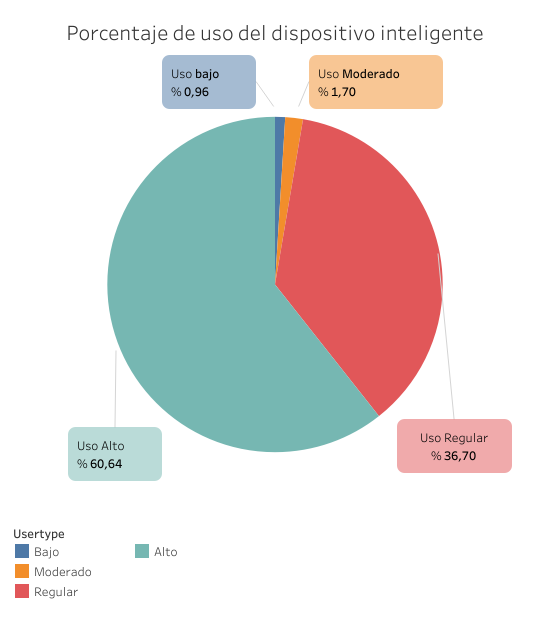

In [148]:
display_png(file="C:/Users/Joako/Documents/R_proyectos/Caso_practico/Informe_jupyter/Imagenes/Porcentaje_uso.png")

### Horas de mayor actividad física

In [160]:
intensities <- hourly_intensities %>%
  group_by(time) %>%
  summarise(avg_intensity = mean(averageintensity))

###### Visualizar horas de mayor actividad física

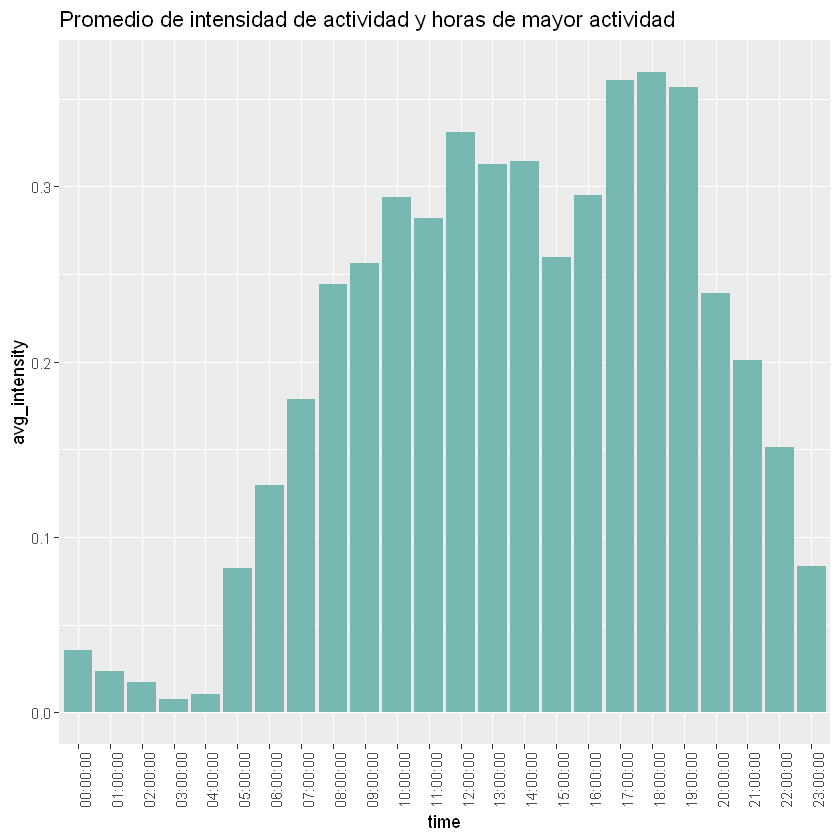

In [163]:
ggplot(data = intensities, aes(x = time, y = avg_intensity)) +
  geom_bar(stat = "identity", fill = "#76b7b2") +
  labs(title = "Promedio de intensidad de actividad y horas de mayor actividad") +
  theme(axis.text.x = element_text(angle = 90))

#### Creación de data.frame para el cálculo del consumo de calorías diarias
La idea es poder contabilizar cuantas calorías diarias quema o consume cada persona y obtener un promedio de calorías quemadas y establecer un patrón de comparación

In [35]:
sum_diaria_v1 <- intensity_calories %>%
  select(id, date, intensity, calories) %>%
  group_by(id, date) %>%
  summarise(total_diaria =sum(calories),
            .groups = "drop")

In [36]:
head(sum_diaria_v1)

id,date,total_diaria
<dbl>,<date>,<dbl>
1503960366,2016-04-11,141.8846
1503960366,2016-04-12,1960.1939
1503960366,2016-04-13,1791.0964
1503960366,2016-04-14,1784.4898
1503960366,2016-04-15,1752.0073
1503960366,2016-04-16,1833.4887


Obtener promedios diarios por id del consumo de calorías

In [37]:
promedio_calorias_id <- aggregate(total_diaria ~ id + date, sum_diaria_v1, mean)
head(promedio_calorias_id)

,id,date,total_diaria
,<dbl>,<date>,<dbl>
1,1503960366,2016-04-11,141.8846
2,1624580081,2016-04-11,106.5342
3,1644430081,2016-04-11,175.3814
4,1844505072,2016-04-11,112.2840
5,1927972279,2016-04-11,170.1260
6,2022484408,2016-04-11,124.5240


Creación de una escala de comparación por encima o por debajo de la media de cada sujeto de gasto calórico diario

In [38]:
sum_diaria_v1$encima_avg <- ifelse(sum_diaria_v1$total_diaria > promedio_calorias_id$total_diaria, "Por encima", "Por debajo")

In [39]:
resumen <- table(sum_diaria_v1$id, sum_diaria_v1$encima_avg)
head(resumen)

            
             Por debajo Por encima
  1503960366          1         30
  1624580081         28          4
  1644430081          6         25
  1844505072         27          5
  1927972279         17         15
  2022484408         12         20

In [40]:
resumen_df <- as.data.frame.matrix(resumen)
colnames(resumen_df) <- c("debajo", "encima")

In [41]:
resumen_df$id <- rownames(resumen_df)

In [42]:
tabla_larga <- pivot_longer(resumen_df, cols = c("debajo", "encima"), names_to = "tipo", values_to = "dias")

Formateo de tabla en formato largo

In [43]:
head(tabla_larga)

id,tipo,dias
<chr>,<chr>,<int>
1503960366,debajo,1
1503960366,encima,30
1624580081,debajo,28
1624580081,encima,4
1644430081,debajo,6
1644430081,encima,25


simplificar los id de los sujetos por numeros más pequeños de modo que en el gráfico no se solapen entre si

In [86]:
tabla_larga_v1 <- tabla_larga %>%
  group_by(id) %>%
  mutate(id_simple = group_indices() + 1) %>%
  ungroup()

Warning message:
"There were 33 warnings in `mutate()`.
The first warning was:
ℹ In argument: `id_simple = group_indices() + 1`.
ℹ In group 1: `id = "1503960366"`.
Caused by warning:
! `group_indices()` was deprecated in dplyr 1.0.0.
ℹ Please use `cur_group_id()` instead.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 32 remaining warnings."


In [87]:
head(tabla_larga_v1)

id,tipo,dias,id_simple
<chr>,<chr>,<int>,<dbl>
1503960366,debajo,1,2
1503960366,encima,30,2
1624580081,debajo,28,3
1624580081,encima,4,3
1644430081,debajo,6,4
1644430081,encima,25,4


nota 1: Migrar tabla_larga_v1 para realizar gráfico en tableau

In [89]:
write.csv(tabla_larga_v1, "tabla_larga_v1.csv", row.names = FALSE)

##### Gráfico 2. Comparación gasto calórico diario de cada sujeto contra su propia media

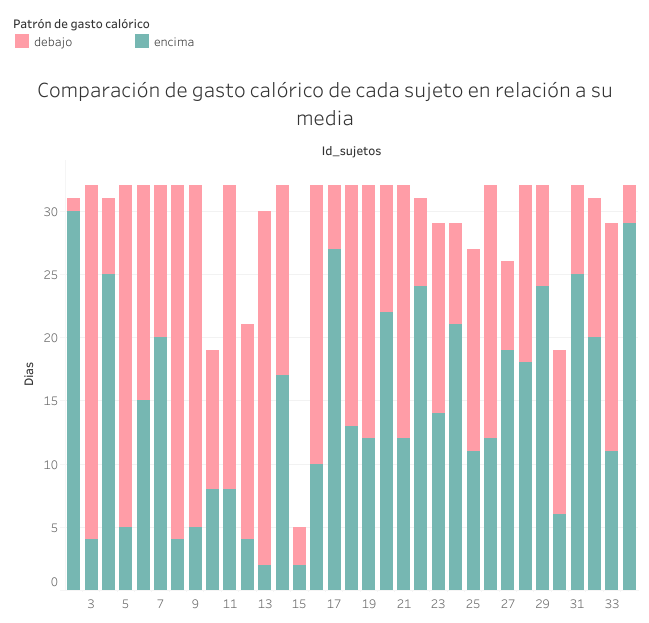

In [92]:
display_png(file="C:/Users/Joako/Documents/R_proyectos/Caso_practico/Informe_jupyter/Imagenes/Comparación_ gasto_calórico.png")

### Estimación del consumo de calorías según la intensidad
La idea es precisar el impacto del nivel de intensidad de la actividad física y el consumo de calorías para determinar si hay alguna relación significativa entre ambas variables

Creación de un data.frame seleccionando unas variables vinculadas con la intensidad en minutos y las calorías quemadas

In [95]:
estimacion_calorias <- daily_activity %>%
  select(id, date, veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes, calories)

In [96]:
head(estimacion_calorias)

id,date,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,25,13,328,728,1985
1503960366,2016-04-13,21,19,217,776,1797
1503960366,2016-04-14,30,11,181,1218,1776
1503960366,2016-04-15,29,34,209,726,1745
1503960366,2016-04-16,36,10,221,773,1863
1503960366,2016-04-17,38,20,164,539,1728


In [181]:
resumen_rango_actividad <- estimacion_calorias %>%
    select(veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes, calories) %>%
    summary()
    View(resumen_rango_actividad)

 veryactiveminutes fairlyactiveminutes lightlyactiveminutes sedentaryminutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  
    calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

In [182]:
resumen_rango_actividad <- estimacion_calorias %>%
    select(veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes, calories) %>%
    summarise_all(mean)
    View(resumen_rango_actividad)

veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.16489,13.56489,192.8128,991.2106,2303.61


#### Creación rango de intensidad
El data.frame hourly_intensities en la columna totalintensity refleja que el rango es de 0 a 180 estos puntajes los dividi en tres para tener un criterio de comprobación de la intensidad y el consumo de calorías

##### Creación de data.frame para estimar el consumo de calorías según el rango de intensidad

In [194]:
intensities_calories <- merge(hourly_calories, hourly_intensities, by=c("id", "date", "time"))

In [195]:
inten_calor <- intensities_calories %>%
  select(id, date, time, calories, totalintensity)

In [197]:
inten_calor %>%
  select(calories, totalintensity) %>%
  summary()

    calories      totalintensity  
 Min.   : 42.00   Min.   :  0.00  
 1st Qu.: 63.00   1st Qu.:  0.00  
 Median : 83.00   Median :  3.00  
 Mean   : 97.39   Mean   : 12.04  
 3rd Qu.:108.00   3rd Qu.: 16.00  
 Max.   :948.00   Max.   :180.00  

In [198]:
inten_calor_60 <- inten_calor %>%
  filter(totalintensity <= 60) %>%
  summarise(promedio = mean(totalintensity))

inten_calor_120 <- inten_calor %>%
  filter(totalintensity > 61 & totalintensity <=120) %>%
  summarise(promedio = mean(totalintensity))

inten_calor_180 <- inten_calor %>%
  filter(totalintensity > 121 & totalintensity <=180) %>%
  summarise(promedio = mean(totalintensity))

In [199]:
resumen_inten_calor <- bind_rows(
  data.frame(rango = "<= 60", promedio = inten_calor_60$promedio),
  data.frame(rango = "61-120", promedio = inten_calor_120$promedio),
  data.frame(rango = "121-180", promedio = inten_calor_180$promedio)
)

###### Visualizar promedio de calorías quemadas según rango de intensidad

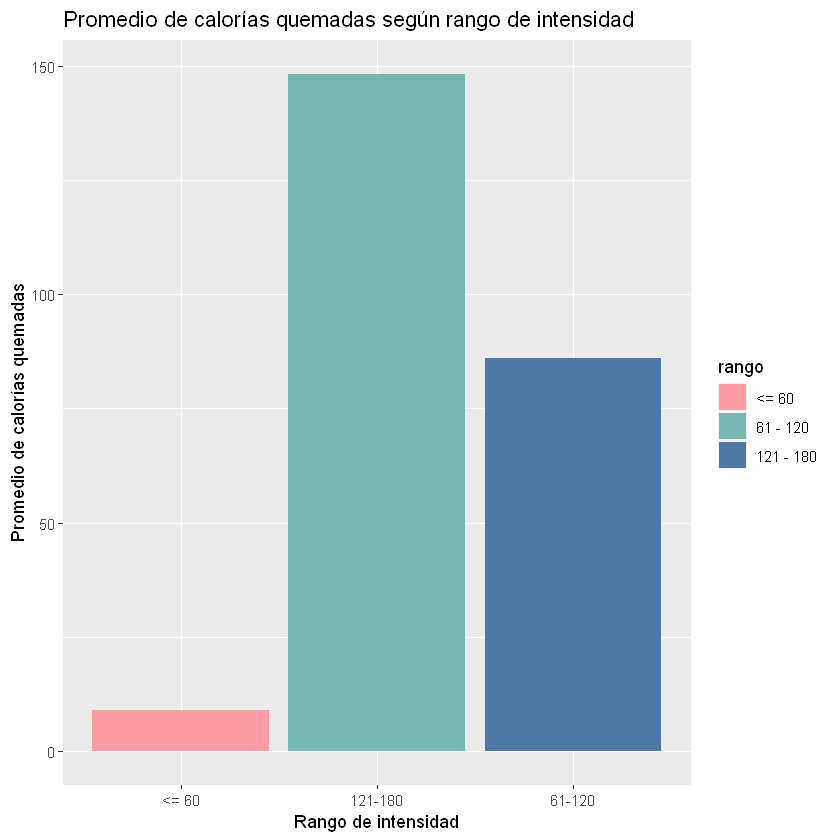

In [200]:
ggplot(resumen_inten_calor, aes(x = rango, y = promedio)) +
  geom_bar(stat = "identity", aes(fill=rango)) +
  labs(title = "Promedio de calorías quemadas según rango de intensidad",
       x = "Rango de intensidad", y = "Promedio de calorías quemadas")+
  scale_fill_manual(values=c("#ff9da7", "#76b7b2", "#4e79a7"), 
                    labels=c("<= 60", "61 - 120", "121 - 180"))

### Horas de sueño y actividad física

In [167]:
sleep <- sleep_day_df %>%
  select( totalsleeprecords, totalminutesasleep, totaltimeinbed) %>%
  summary()
View(sleep)

 totalsleeprecords totalminutesasleep totaltimeinbed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

#### Creación de un data.frame con datos del registro de sueño y actividad física
La idea es identificar si hay algún patron entre dormir una vez o más de una vez en la cantidad de actividad física realizada

In [175]:
activity_sleep <- merge(sleep_day_df, daily_activity, by =c("id", "date"))

In [176]:
sleep_activity <- activity_sleep %>%
  select(id, date, totalsleeprecords, totalsteps) %>%
  group_by(totalsleeprecords) %>%
  summarise(avg = mean(totalsteps))
View(sleep_activity)

totalsleeprecords,avg
<dbl>,<dbl>
1,8750.893
2,6725.930
3,5524.333


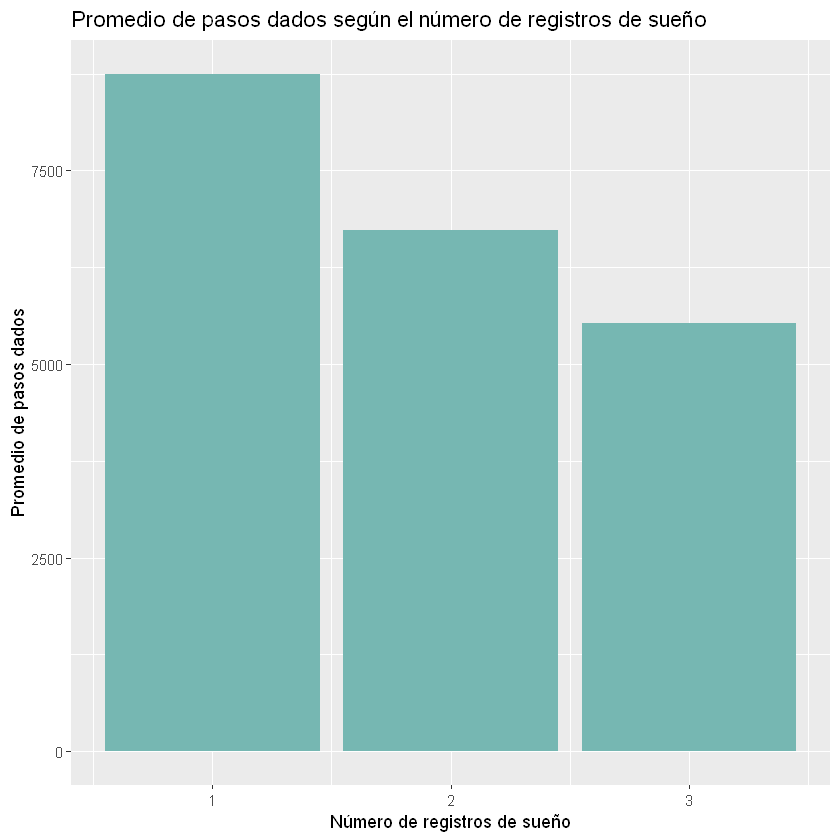

In [178]:
ggplot(sleep_activity, aes(x = totalsleeprecords, y = avg)) +
  geom_bar(stat = "identity", fill = "#76b7b2") +
  labs(title = "Promedio de pasos dados según el número de registros de sueño",
       x = "Número de registros de sueño", y = "Promedio de pasos dados")